## Below are the steps executed in this notebook
<b> 1. IMPORT LIBRARIES </b> <br>
<b> 2. LOAD DATASET </b> <br>
<b> 3. EDA </b> <br>
- 1. Target Column Distribution
- 2. Correlation Heatmap
- 3. Check Relation Between Categorical with Satisafaction
    - 1. Age
    - 2. Flight Distance
    - 3. Departure Delay
    - 4. Arrival Delay
- 4. Remaining Columns Analysis 

<b> 4. Expoert Data To Model Building</b><br>
<b> 5. Observations (countplot & heatmap correlation)</b><br>

# 1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# 2. LOAD DATASET

In [2]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

df_encoded = pd.read_csv('airline_passenger_satisfaction_EDA.csv')

print('Total Row : ', len(df))
df_encoded.head(5)

Total Row :  129880


,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus,Satisfaction
0,1,48,821,2,5.0,3,3,4,3,3,...,0,1,1,0,1,0,1,0,0,1
1,2,35,821,26,39.0,2,2,3,5,2,...,1,0,0,1,1,0,1,0,0,0
2,3,41,853,0,0.0,4,4,4,5,4,...,0,1,0,1,1,0,1,0,0,0
3,4,50,1905,0,0.0,2,2,3,4,2,...,0,1,0,1,1,0,1,0,0,0
4,5,49,3470,0,1.0,3,3,3,5,3,...,1,0,0,1,1,0,1,0,0,0


# 3. EDA

## 1. Target Column Distribution

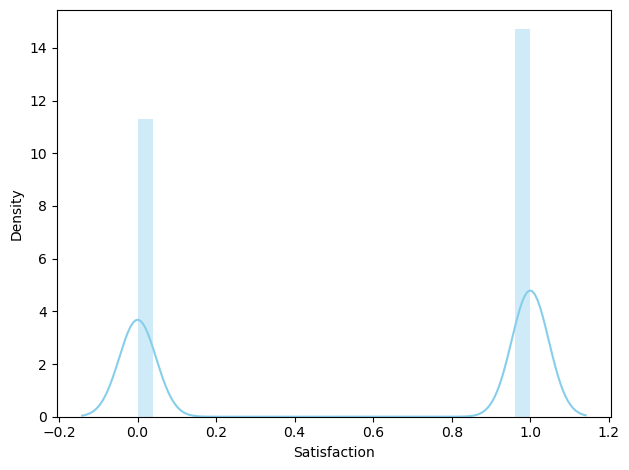

In [3]:
sns.distplot(x=df_encoded['Satisfaction'], color='skyblue')
plt.xlabel('Satisfaction')
plt.tight_layout()

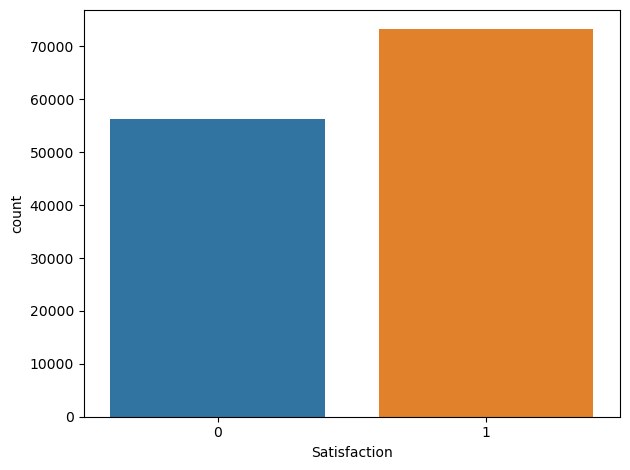

In [4]:
sns.countplot(x=df_encoded['Satisfaction'])
plt.xlabel('Satisfaction')
plt.tight_layout()

**OBSERVATION:**

the class distribution is skewed towards the Neutral or Dissatisfied class. It shows that this dataset is slightly imbalanced

## 2. Correlation Heatmap

<AxesSubplot:>

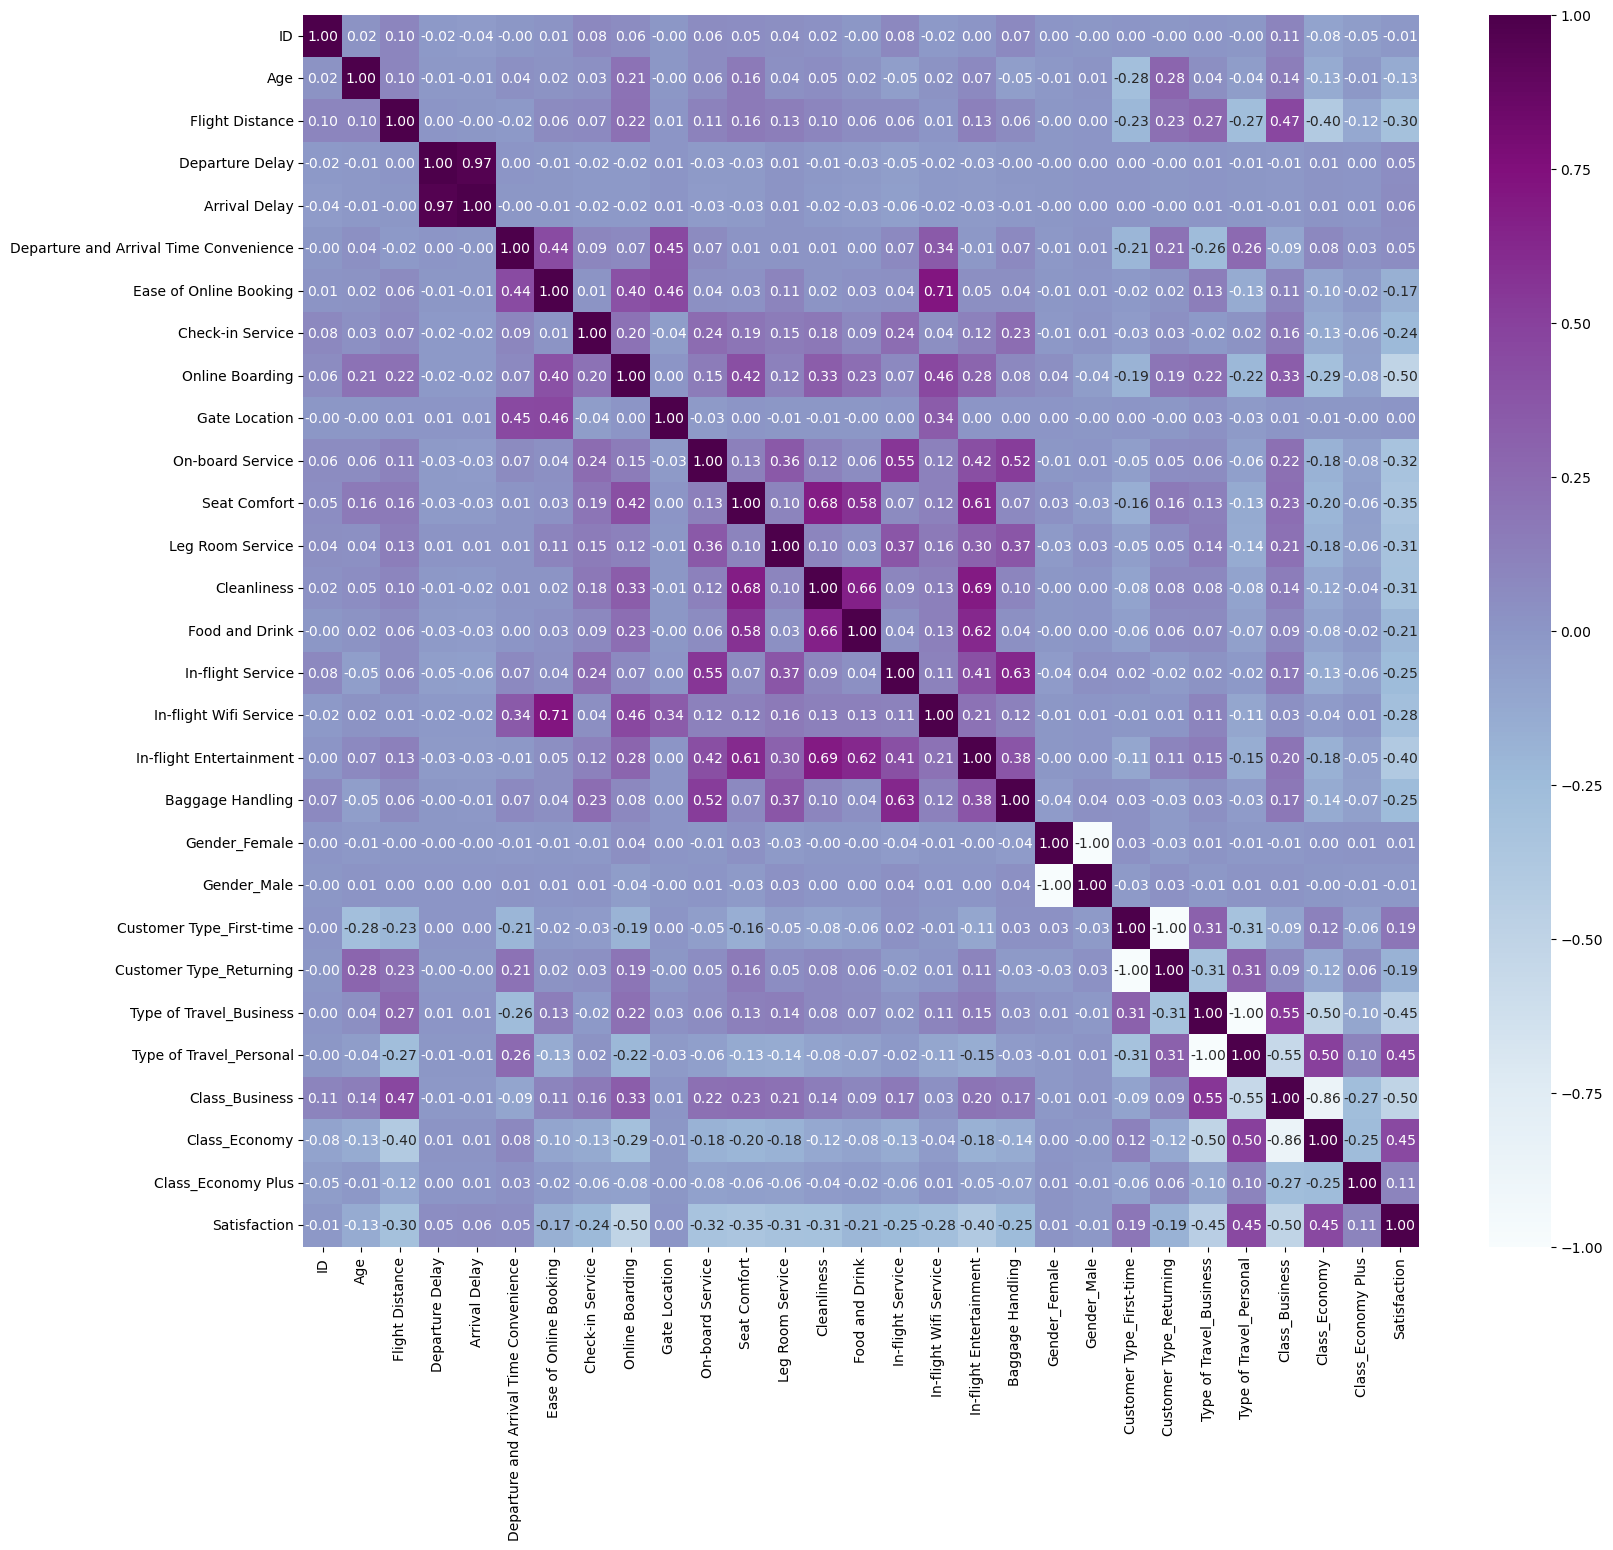

In [5]:
correlation = df_encoded.corr()
plt.figure(figsize = (18, 16))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='BuPu')

**Observations:**

Departure delay and arrival delay are highly correlated with each other. 0.97 shows strong positive correlation this means that as departure delays increase, there is a very strong tendency for arrival delays to also increase. In other words, flights that experience longer departure delays are likely to arrive later than those that experience shorter departure delays.

In any case, this strong correlation highlights the importance of managing departure delays in order to minimize the impact on arrival times and improve overall airline efficiency.

## 3. Check Relation Between Categorical with Satisafaction

### 1. Age

In [1]:
##### create a new DataFrame from the 'df' DataFrame
df_age = df[['ID', 'Age', 'Satisfaction']]

# create a function to map ages to categories
def age_category(age):
    if age <= 10:
        return 'Child'
    elif age <= 19:
        return 'Adolescent'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Elderly'

# create a new column 'Age Category' based on 'Age' column
df_age['Age Category'] = df_age['Age'].apply(age_category)

ageorder = ['Child', 'Adolescent', 'Adult', 'Elderly']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
# create a countplot of the number of satisfied individuals in each age category
sns.countplot(data=df_age, x='Age Category', hue='Satisfaction', order=ageorder)

# add titles and labels
plt.title('Satisfaction by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')

# show the plot
plt.show()

NameError: name 'df' is not defined

**Objectives (fron table above):**

1. All age categories are mostly neutral or dissatisfied.

2. In adult passenger categories, the older the passengers, the total of neutral or dissatisfaction passengers decreases.

3. The most satisfied passengers are passengers are adults

### 2. Flight Distance

In [7]:
df_dist = df[['ID', 'Flight Distance', 'Satisfaction']]
df_dist['Distance (km)'] = df_dist['Flight Distance'] * 1.60934

def distance_category(distance):
    if distance < 1000:
        return '1,100–1,500 km'
    elif distance < 4100:
        return '1,500 - 4,099 km' #ini klo diubah jd 4,100 datanya gamau muncul, knp?
    else:
        return '>4,100 km'

df_dist['Distance Category'] = df_dist['Distance (km)'].apply(distance_category)

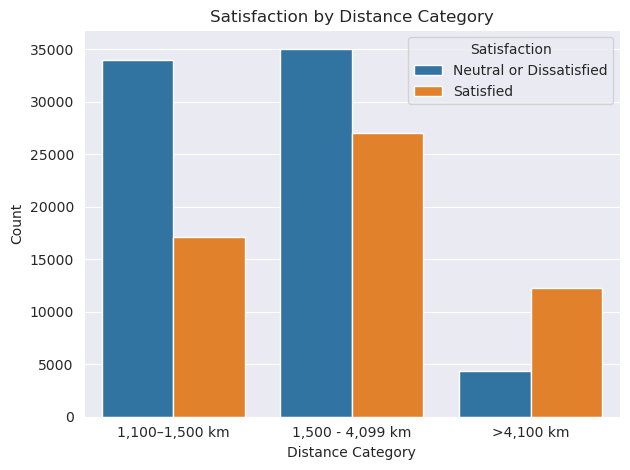

In [8]:
distorder = ['1,100–1,500 km', '1,500 - 4,099 km', '>4,100 km']
sns.countplot(data=df_dist, x='Distance Category', hue='Satisfaction', order=distorder)


# add titles and labels
plt.title('Satisfaction by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Count')
plt.tight_layout()

# show the plot
plt.show()

**Objectives:**

1. This airline passenger are mostly have medium haul flight (1,500 - 4100 KM) [notes: ini kalo x labelnya diubah jd 4,100 datanya hilang knp ya?]

2. Most of the passenger are neutral or dissatisfied but for the passenger who has long haul flight are satisfied with the airline service

### 3. Departure Delay

In [9]:
df_deptdelay = df[['ID', 'Departure Delay', 'Satisfaction']]

def dept_delay_category(time):
    if time <= 15:
        return 'Delay <15 mins'
    if time <= 30:
        return 'Delay 15 - 30 mins'
    if time <= 60:
        return 'Delay 30-60 mins'
    else:
        return 'Delay >1 hr'

df_deptdelay['Departure Delay Category'] = df_deptdelay['Departure Delay'].apply(dept_delay_category)

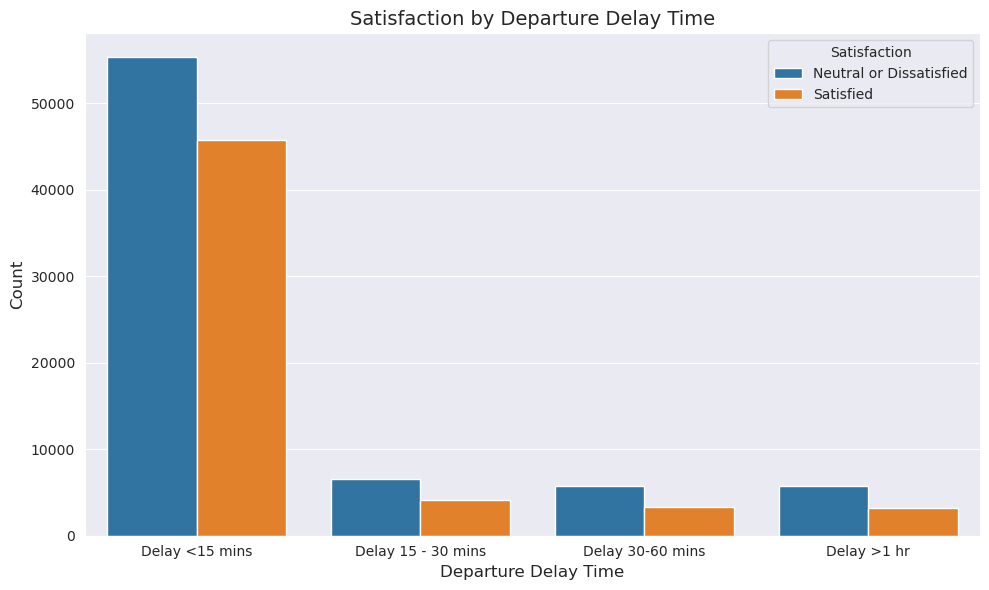

In [10]:
deptorder = ['Delay <15 mins', 'Delay 15 - 30 mins', 'Delay 30-60 mins', 'Delay >1 hr']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=df_deptdelay, x='Departure Delay Category', hue='Satisfaction', order=deptorder)

# add titles and labels
plt.title('Satisfaction by Departure Delay Time', fontsize=14)
plt.xlabel('Departure Delay Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

# show the plot
plt.show()



### 4. Arrival Delay

In [11]:
df_arvdelay = df[['ID', 'Arrival Delay', 'Satisfaction']]
df_arvdelay['Arrival Delay Category'] = df_arvdelay['Arrival Delay'].apply(dept_delay_category)

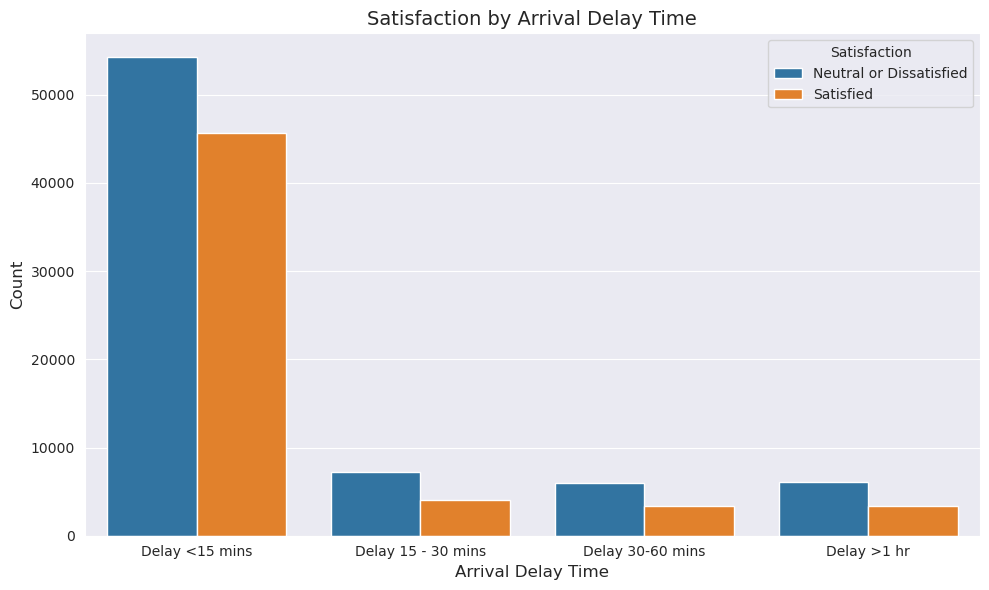

In [12]:
deptorder = ['Delay <15 mins', 'Delay 15 - 30 mins', 'Delay 30-60 mins', 'Delay >1 hr']

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=df_arvdelay, x='Arrival Delay Category', hue='Satisfaction', order=deptorder)

# add titles and labels
plt.title('Satisfaction by Arrival Delay Time', fontsize=14)
plt.xlabel('Arrival Delay Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

# show the plot
plt.show()

**Objectives:**

1.  Based on the correlation heatmap, departure delay and arrival delay is highly correlated to each other so when departure delay increase, arrival delay will increase too. as can be seen on the chart, the total passengers are the same for each time in departure and arrival delay.

2. This airline is most likely to experience delays of less than 15 minutes.

3. There is a decrease in passenger satisfaction as the duration of delays increases.

## 4. Remaining Columns Analysis

In [13]:
data = ['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling',]

len(data)

18

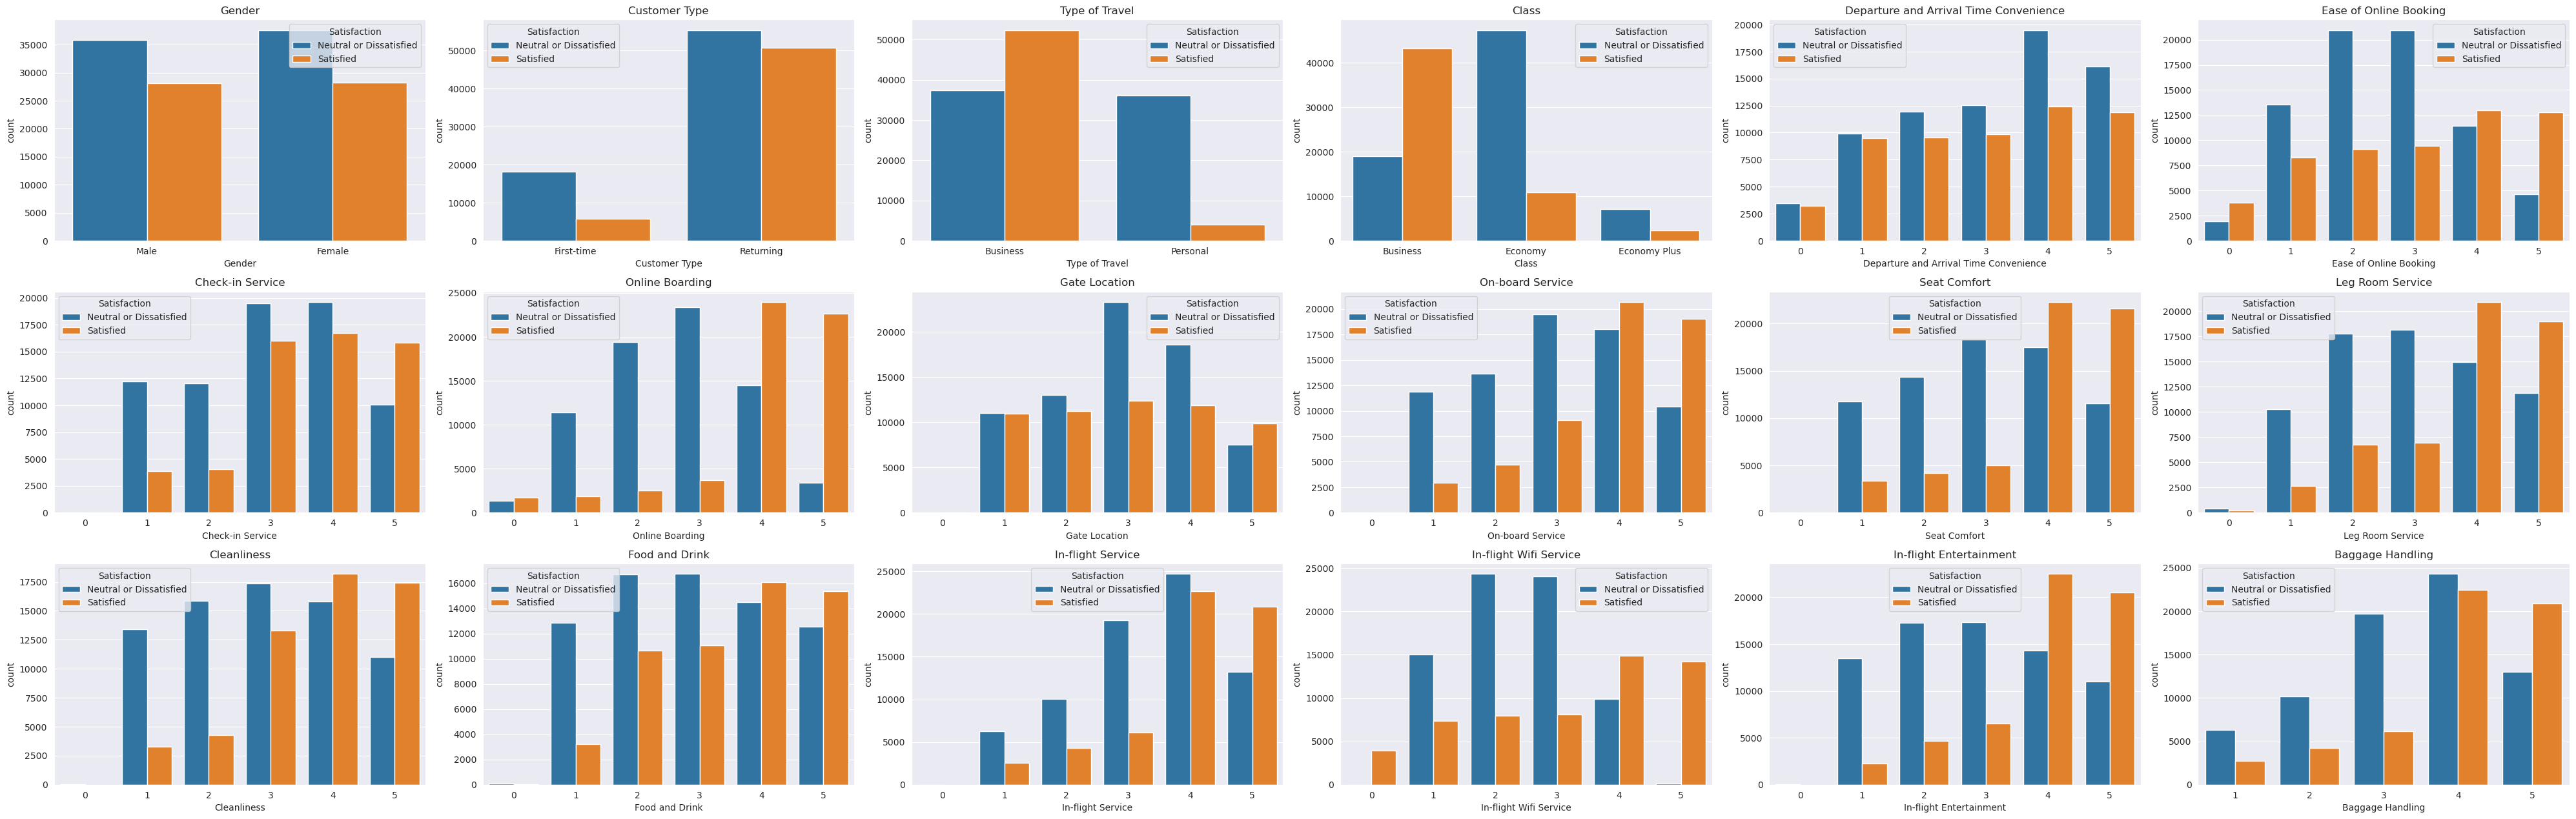

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(40,25))
for i in range(len(data)):
    plt.subplot(6,6,i+1)
    plt.title(data[i])
    sns.countplot(x=df[data[i]],hue=df['Satisfaction'])
     
plt.tight_layout()

## 4. Expoert Data To Model Building

In [15]:
df_encoded.to_csv("airline_passenger_satisfaction_model_build.csv",index=False)

## 5. Observations (countplot & heatmap correlation):

1. Neutral or Dissatisfied is dominated in all categories. 

2. Both gender are mostly Neutral or Dissatisfied. But the correlation coefficient shows 0.01 and -0.01 for satisfaction. it shows that there is almost no relationship between gender and satisfaction. This means that gender is not a strong predictor of customer satisfaction in this dataset.

3. Returning customer dominated the satisfaction categories but most of them are neutral or dissatisfied. the correlation coefficient of first time customer -0.19 for satisfaction and 0.19 for satisfaction returning customer suggest that there is a weak relationship between customer loyalty and satisfaction. This means that customers who have flown with the airline before tend to be more satisfied with their experience than those who are flying with the airline for the first time.

4. Passenger with the needs of business are mostly satisfied. The correlation coefficient shows moderate positive relationship for business needs and moderate negative relationship for personal needs This means that customers who are traveling for personal reasons tend to be less satisfied with their experience compared to those who are traveling for business.

5. Passenger in business class are mostly satisfied compared to economy class. from the countplot and correlation shows that as the class of the flight moves from economy to higher classes, there is a tendency for satisfaction to increase. In other words, passengers who are flying in higher classes are generally more satisfied than those who are flying in economy class.

6. although the passenger are mostly satisfied with Departure and Arrival Time Convenience, but overall they are mostly neutral or dissatisfied. the correlation shows -0.05 which means that Departure and Arrival Time Convenience is not a strong predictor of customer satisfaction in this dataset.

7. As seen on the graph, passengers are mostly neutral or dissatisfied with the Ease of Online Booking. it means for most of them the online booking is still complicated or difficult. a correlation coefficient of 0.17 shows weak relationship between  Ease of Online Booking and Satisfaction so it is not a strong predictor of customer satisfaction

8. Passenger are mostly neutral to satisfied with the check-in service. a correlation coefficient of 0.24 suggests a weak positive relationship between the two variables. This means that as satisfaction with the check-in service increases, there is a slight tendency for overall passenger satisfaction to also increase.

9. Passengers are mostly satisfied with the online boarding, but passenger who are neutral or dissatisfied with the online boarding also feel neutral or dissatisfied for overall airline services. The correlation coefficient of 0.50 shows moderate positive relationship. This means that as satisfaction with the online booking process increases, there is a tendency for overall passenger satisfaction to also increase.

10. Passengers are mostly neutral to satisfied with the gate location of the airline. from the heatmap it shows no correlation at all with the overall satisfaction so the gate location is not a factor of passenger satisfaction.

11. Passenger are satisfied with on-board service, Seat Comfort, Leg Room Service, Cleanliness, Food & Drink, In-Fligth Services, In-Flight Entertainment, and Baggage Handling. but for passenger who are dissatisfied with these services also most likely dissatisfied with overall airline service. the correlation heatmap shows positive correlation between satisfaction and these services, meaning that as these services increases, so does passenger satisfaction espesically for in-flight entertainment.

12. In-flight Wifi Service dominated by neutral or dissatisfied passenger. the correlation heatmap shows positive correlation between satisfaction and in flight wifi service. This means that as in-flight wifi service improves, there tends to be a corresponding increase in passengers' satisfaction with the airline.